In [1]:
import yt
import numpy as np

## load_uniform_grid

provide dummy dimensions

yt : [INFO     ] 2022-11-01 15:25:17,659 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-11-01 15:25:17,660 Parameters: domain_dimensions         = [5 3 1]
yt : [INFO     ] 2022-11-01 15:25:17,661 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-11-01 15:25:17,661 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-11-01 15:25:17,662 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-11-01 15:25:17,775 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-11-01 15:25:17,775 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-11-01 15:25:17,776 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-11-01 15:25:17,777 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-11-01 15:25:17,780 Making a fixed resolution buffer of (('stream', 'density')) 800 by 800



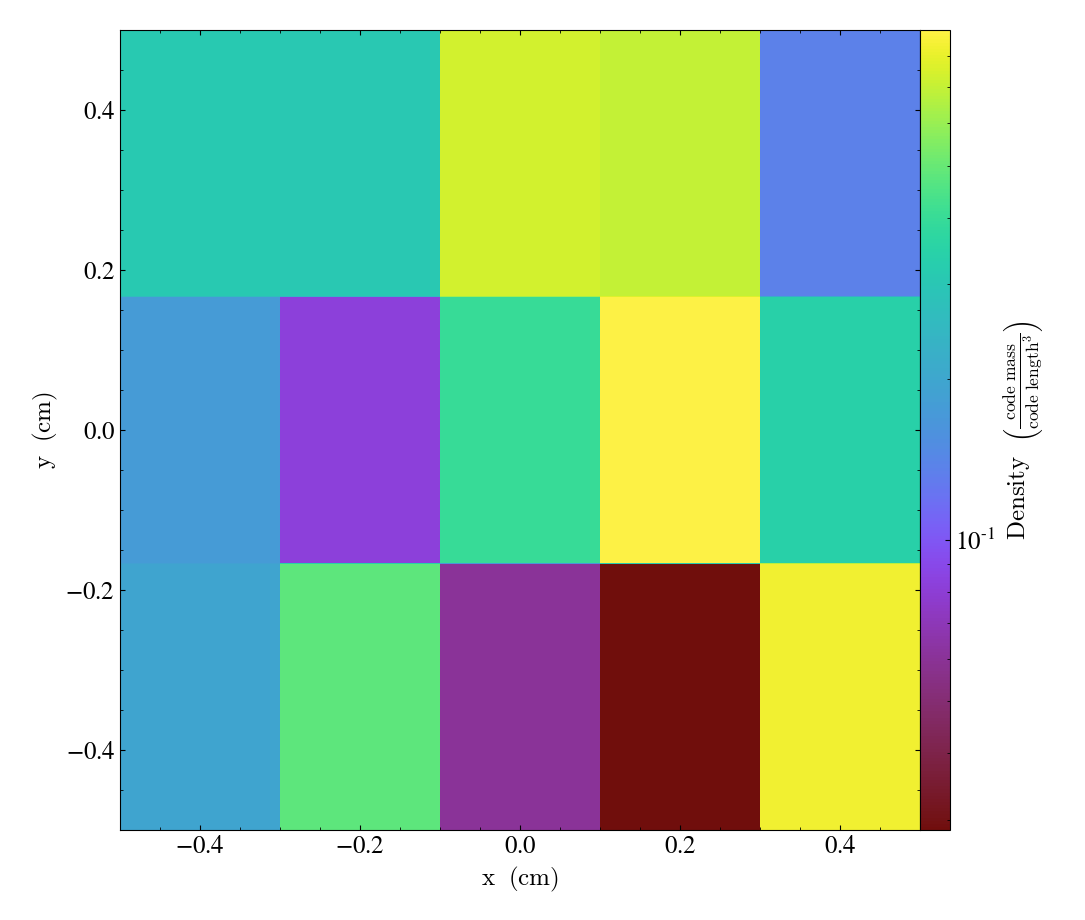

In [2]:
shp = (5, 3, 1)
data = {"density": np.random.random(shp)}
ds = yt.load_uniform_grid(data, shp, geometry=("cartesian", ("x", "y", "z")))
yt.SlicePlot(ds, "z", ("stream", "density"))

bbox requires dummy dimension as well:

yt : [INFO     ] 2022-11-01 16:00:49,303 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-11-01 16:00:49,304 Parameters: domain_dimensions         = [1 5 3]
yt : [INFO     ] 2022-11-01 16:00:49,305 Parameters: domain_left_edge          = [-0.5 -4.  -5. ]
yt : [INFO     ] 2022-11-01 16:00:49,306 Parameters: domain_right_edge         = [0.5 4.  5. ]
yt : [INFO     ] 2022-11-01 16:00:49,306 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-11-01 16:00:49,410 xlim = -5.000000 5.000000
yt : [INFO     ] 2022-11-01 16:00:49,410 ylim = -4.000000 4.000000
yt : [INFO     ] 2022-11-01 16:00:49,411 xlim = -5.000000 5.000000
yt : [INFO     ] 2022-11-01 16:00:49,411 ylim = -4.000000 4.000000
yt : [INFO     ] 2022-11-01 16:00:49,414 Making a fixed resolution buffer of (('stream', 'density')) 800 by 800



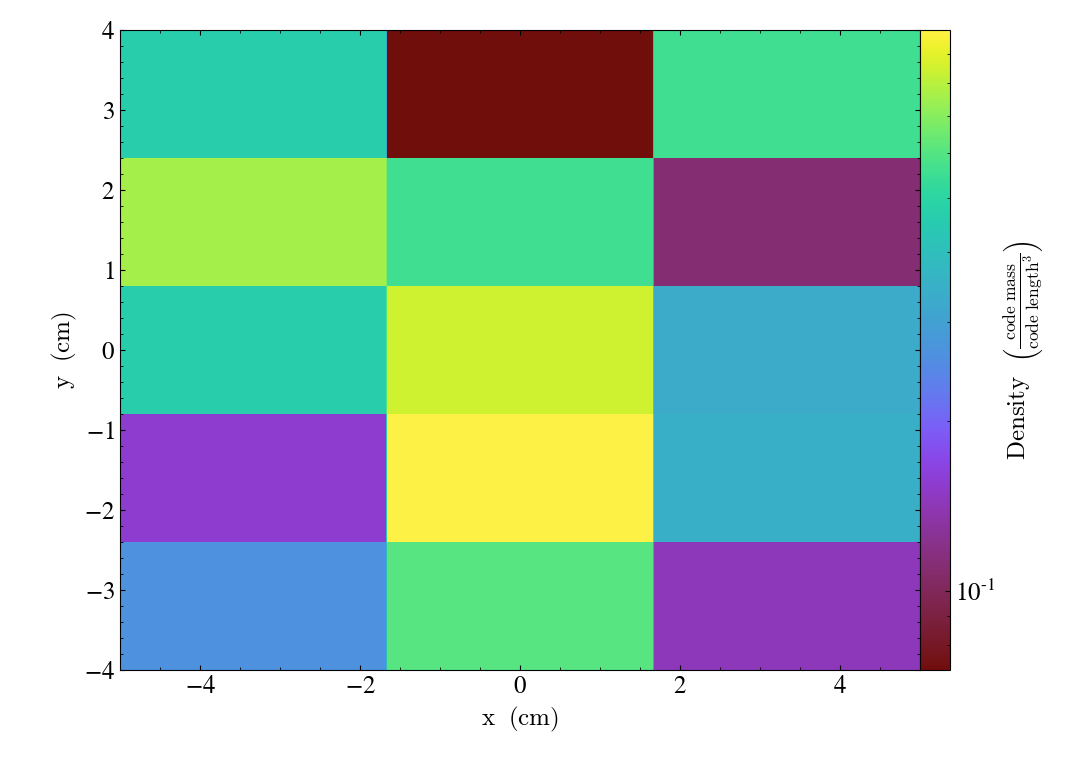

In [22]:
shp = (1, 5, 3)
bbox = np.array([[-0.5, 0.5], [-4., 4.], [-5., 5.], ])
data = {"density": np.random.random(shp)}
ds = yt.load_uniform_grid(data, 
                          shp, 
                          geometry=("cartesian", ("z", "y", "x")),
                          bbox=bbox)
yt.SlicePlot(ds, "z", ("stream", "density"))

works with other geometries:

yt : [INFO     ] 2022-11-01 15:25:19,083 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-11-01 15:25:19,084 Parameters: domain_dimensions         = [15 33  1]
yt : [INFO     ] 2022-11-01 15:25:19,084 Parameters: domain_left_edge          = [ -90.  -180.    -0.5]
yt : [INFO     ] 2022-11-01 15:25:19,085 Parameters: domain_right_edge         = [ 90.  180.    0.5]
yt : [INFO     ] 2022-11-01 15:25:19,085 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-11-01 15:25:19,184 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-11-01 15:25:19,185 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-11-01 15:25:19,185 Setting origin='native' for geographic geometry.
yt : [INFO     ] 2022-11-01 15:25:19,185 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-11-01 15:25:19,186 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-11-01 15:25:19,222 Making a fixed resolution buffer of (('stream', 'density')) 800 by 800



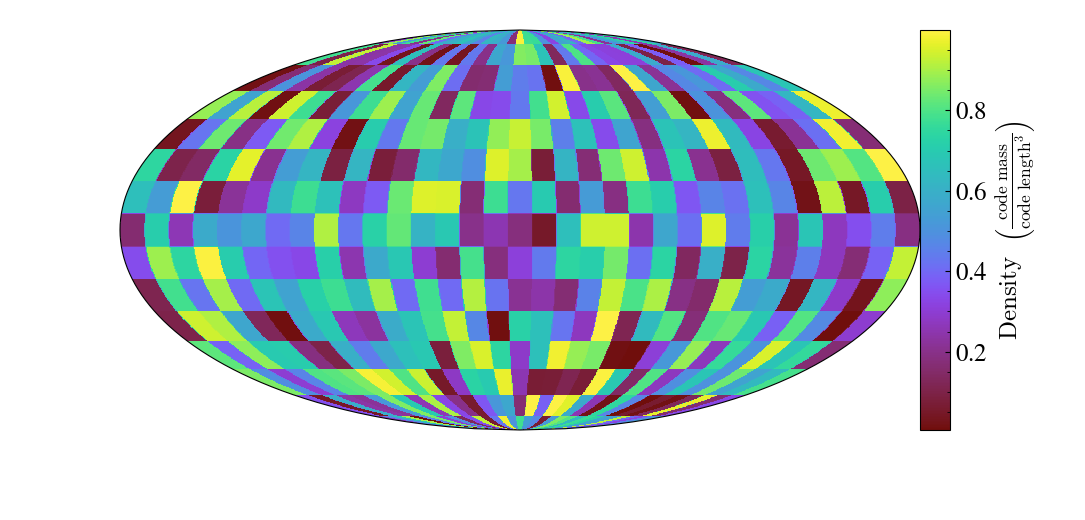

In [4]:
shp = (15, 33, 1)
data = {"density": np.random.random(shp)}
ds = yt.load_uniform_grid(data, 
                          shp, 
                          bbox=np.array([[-90, 90], [-180, 180], [-.5, 0.5]]),
                          geometry=("geographic", 
                                    ("latitude", "longitude", "altitude"))
                         )
slc = yt.SlicePlot(ds, "altitude", ("stream", "density"))
slc.set_log(("stream", "density"), False)
slc.show()

## Generic AMR Data

yt : [INFO     ] 2022-11-01 16:26:40,828 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-11-01 16:26:40,829 Parameters: domain_dimensions         = [32 32  1]
yt : [INFO     ] 2022-11-01 16:26:40,829 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-11-01 16:26:40,830 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-11-01 16:26:40,830 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-11-01 16:26:40,913 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-11-01 16:26:40,914 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-11-01 16:26:40,914 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-11-01 16:26:40,915 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-11-01 16:26:40,917 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



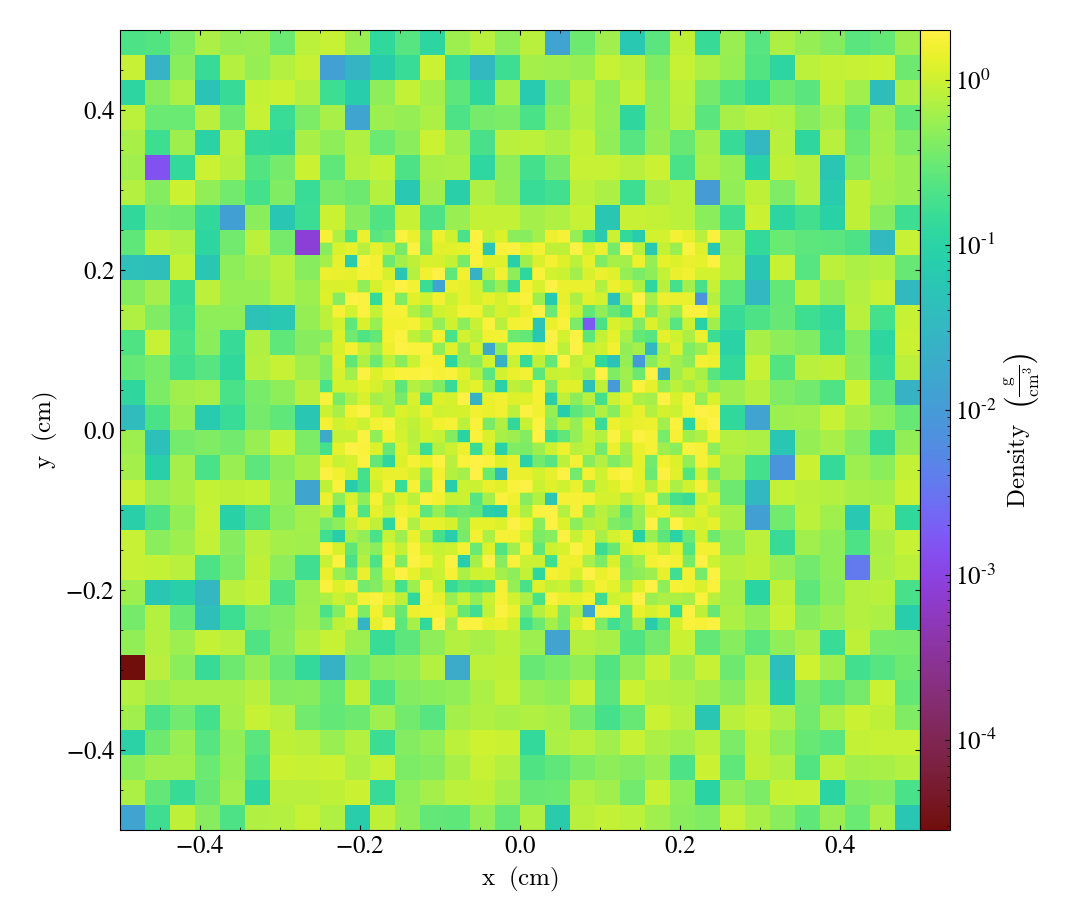

In [44]:
import numpy  as np
import yt

grid_data = [
    dict(
        left_edge=[0.0, 0.0, 0.],
        right_edge=[1.0, 1.0, 1.],
        level=0,
        dimensions=[32, 32, 1],
    ),
    dict(
        left_edge=[0.25, 0.25, 0.],
        right_edge=[0.75, 0.75, 1.],
        level=1,
        dimensions=[32, 32, 1],
    ),
]


for g in grid_data:
    g["density"] = (np.random.random(g["dimensions"]) * 2 ** g["level"], "g/cm**3")

    
bbox = np.array([[0., 1.], [0., 1.], [0., 1.]])

ds = yt.load_amr_grids(grid_data, [32, 32, 1], bbox=bbox)
slc = yt.SlicePlot(ds, "z", ("gas", "density"))

slc.show()

yt : [INFO     ] 2022-11-01 16:27:51,209 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-11-01 16:27:51,209 Parameters: domain_dimensions         = [32 32  1]
yt : [INFO     ] 2022-11-01 16:27:51,210 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-11-01 16:27:51,211 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-11-01 16:27:51,211 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-11-01 16:27:51,331 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-11-01 16:27:51,332 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-11-01 16:27:51,332 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-11-01 16:27:51,333 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-11-01 16:27:51,335 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



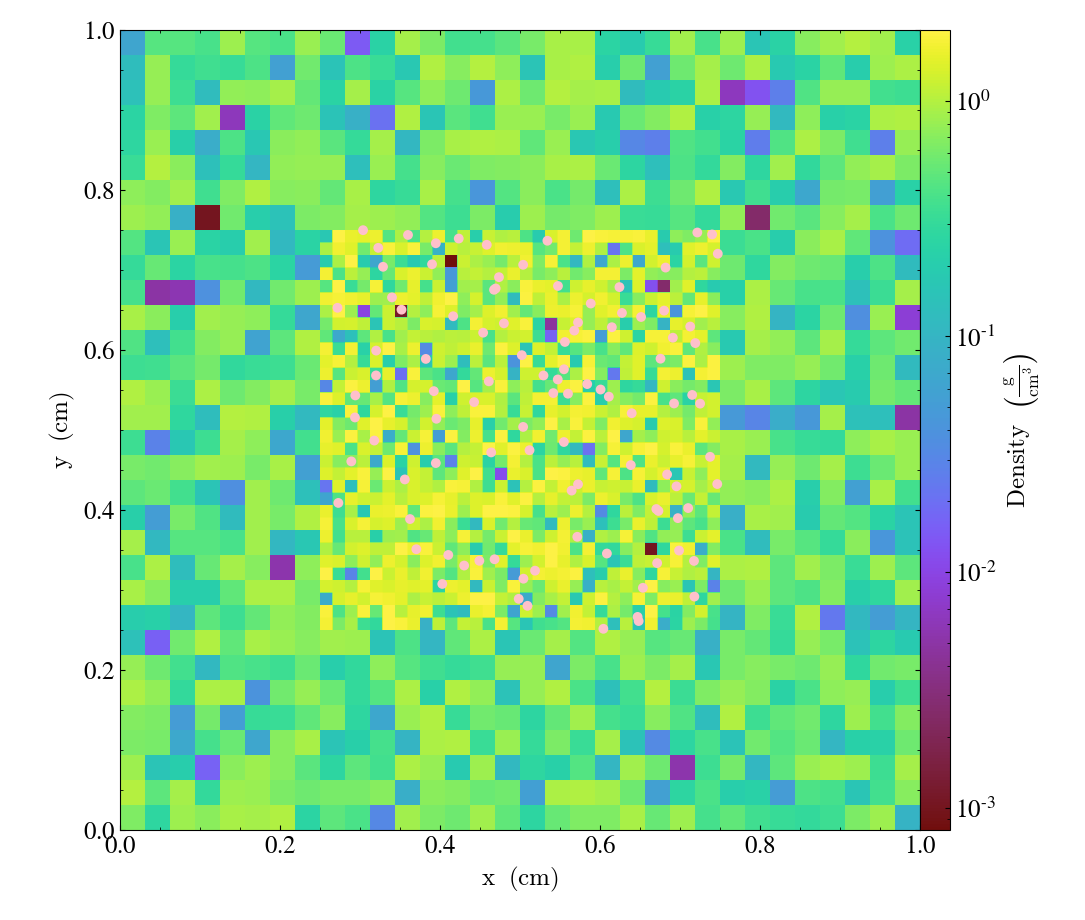

In [45]:
import numpy  as np
import yt

grid_data = [
    dict(
        left_edge=[0.0, 0.0, 0.],
        right_edge=[1.0, 1.0, 1.],
        level=0,
        dimensions=[32, 32, 1],
    ),
    dict(
        left_edge=[0.25, 0.25, 0.],
        right_edge=[0.75, 0.75, 1.],
        level=1,
        dimensions=[32, 32, 1],
    ),   
]

for g in grid_data:
    g["density"] = (np.random.random(g["dimensions"]) * 2 ** g["level"], "g/cm**3")

    
# only adding particles at the highest level, set empty here
grid_data[0]["particle_position_x"] = (np.array([]),"code_length") 
grid_data[0]["particle_position_y"] = (np.array([]), "code_length")
grid_data[0]["particle_position_z"] = (np.array([]), "code_length")

nparticles=100
grid_data[1]["particle_position_x"] = (
    np.random.uniform(low=0.25, high=0.75, size=nparticles),
    "code_length",
)
grid_data[1]["particle_position_y"] = (
    np.random.uniform(low=0.25, high=0.75, size=nparticles),
    "code_length",
)
grid_data[1]["particle_position_z"] = (
    np.full((nparticles,), np.mean(bbox[2,:])),
    "code_length",
)


bbox = np.array([[0., 1.], [0., 1.], [0., 1.]])


ds = yt.load_amr_grids(grid_data, [32, 32, 1], bbox=bbox)
slc = yt.SlicePlot(ds, "z", ("gas", "density"), origin='native')
slc.annotate_particles(1, p_size=50.0, col="Pink")
slc.show()

In [26]:
import numpy  as np
import yt

grid_data = [
    dict(
        left_edge=[0.0, 0.0, 0.],
        right_edge=[1.0, 1.0, 1.],
        level=0,
        dimensions=[32, 32, 1],
    ),
    dict(
        left_edge=[0.25, 0.25, 0.],
        right_edge=[0.75, 0.75, 1.],
        level=1,
        dimensions=[32, 32, 1],
    ),
    dict(
        left_edge=[0.3125, 0.3125, 0.],
        right_edge=[0.5, 0.5, 1.],
        level=2,
        dimensions=[32, 32, 1],
    ),
    
]


for g in grid_data:
    g["density"] = (np.random.random(g["dimensions"]) * 2 ** g["level"], "g/cm**3")

    
bbox = np.array([[0., 1.], [0., 1.], [0., 1.]])


ds = yt.load_amr_grids(grid_data, [32, 32, 1], bbox=bbox)
slc = yt.SlicePlot(ds, "z", ("gas", "density"))

slc.show()

In [38]:
grid_data = [
    dict(
        left_edge=[0.0, 0.0, 0.],
        right_edge=[1.0, 1.0, 1.],
        level=0,
        dimensions=[32, 32, 1],
    ),
    dict(
        left_edge=[0.25, 0.25, 0.],
        right_edge=[0.75, 0.75, 1.],
        level=1,
        dimensions=[32, 32, 1],
    ),
    dict(
        left_edge=[0.3125, 0.3125, 0.],
        right_edge=[0.5, 0.5, 1.],
        level=2,
        dimensions=[32, 32, 1],
    ),
    
]

np.linspace(grid_data[1]['left_edge'][0],
            grid_data[1]['right_edge'][0],
            grid_data[1]['dimensions'][0], endpoint=False)

array([0.25    , 0.265625, 0.28125 , 0.296875, 0.3125  , 0.328125,
       0.34375 , 0.359375, 0.375   , 0.390625, 0.40625 , 0.421875,
       0.4375  , 0.453125, 0.46875 , 0.484375, 0.5     , 0.515625,
       0.53125 , 0.546875, 0.5625  , 0.578125, 0.59375 , 0.609375,
       0.625   , 0.640625, 0.65625 , 0.671875, 0.6875  , 0.703125,
       0.71875 , 0.734375])

In [ ]:
left_edge=[0.25, 0.25, 0.],
        right_edge=[0.75, 0.75, 1.],
        level=1,
        dimensions=[32, 32, 1],